In [22]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()
warnings.filterwarnings('ignore')

AWS_KEY = os.getenv('AWS_ACCESS_KEY')
AWS_SECRET_KEY = os.getenv('AWS_SECRET_ACCESS_KEY')
AWS_S3_BUCKET = os.getenv('AWS_S3_BUCKET')
REVIEWS_FILE_TEMPLATE = 'reviews/reviews_partition_{}.parquet'

storage_options = {
    'key': AWS_KEY,
    'secret': AWS_SECRET_KEY
}

reviews_files = [
    os.path.join(
        's3://',
        AWS_S3_BUCKET,
        REVIEWS_FILE_TEMPLATE.format(partition + 1)
    )
    for partition in range(20)
]
metadata_file = os.path.join('s3://', AWS_S3_BUCKET, 'metadata/metadata.json')
metadata_proc_file = os.path.join('s3://', AWS_S3_BUCKET, 'metadata/metadata_features.json')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
plt.style.use('seaborn')

In [4]:
metadata = pd.read_json(metadata_proc_file, storage_options=storage_options, orient='index')
metadata.head()

,main_genre,original_title,poster_url,actors,imdb_recommendations,reviews_collected_flg,rating,num_votes,user_review_num,critic_review_num,...,original_language,production_company_1,production_company_2,production_company_3,filming_location,filming_country,budget,boxoffice_gross_domestic,boxoffice_gross_opening,boxoffice_gross_worldwide
/title/tt0002130/,Adventure,Dante's Inferno,https://m.media-amazon.com/images/M/MV5BNjU1ND...,"{'1': '/name/nm0660139', '2': '/name/nm0685283...","{'1': '/title/tt0003740/', '2': '/title/tt0001...",1,7.0,2900,36.0,13.0,...,Italian,Milano Film,SAFFI-Comerio,None,"Bovisa, Milano, Lombardia, Italy",Italy,None,None,None,None
/title/tt0003740/,Adventure,Cabiria,https://m.media-amazon.com/images/M/MV5BZmVjNz...,"{'1': '/name/nm0021935', '2': '/name/nm0702894...","{'1': '/title/tt0006864/', '2': '/title/tt0009...",1,7.1,3600,35.0,26.0,...,Italian,Itala Film,None,None,"FERT Studios, Turin, Piedmont, Italy",Italy,"ITL 1,000,000 (estimated)",None,None,None
/title/tt0004635/,Action,The Squaw Man,https://m.media-amazon.com/images/M/MV5BMjMwOD...,"{'1': '/name/nm0267914', '2': '/name/nm0758457...","{'1': '/title/tt0014532/', '2': '/title/tt0006...",1,5.7,979,9.0,4.0,...,None,Jesse L. Lasky Feature Play Company,None,None,Hollywood Heritage Museum - 2100 North Highlan...,USA,"$20,000 (estimated)",None,None,None
/title/tt0004707/,Comedy,Tillie's Punctured Romance,https://m.media-amazon.com/images/M/MV5BMDZjOW...,"{'1': '/name/nm0000122', '2': '/name/nm0237597...","{'1': '/title/tt0005074/', '2': '/title/tt0006...",1,6.3,3500,41.0,19.0,...,None,Keystone Film Company,None,None,"Sans Souci Castle, Los Angeles, California, USA",USA,"$50,000 (estimated)",None,None,None
/title/tt0004972/,Drama,The Birth of a Nation,https://m.media-amazon.com/images/M/MV5BNWZlNj...,"{'1': '/name/nm0001273', '2': '/name/nm0550615...","{'1': '/title/tt0006864/', '2': '/title/tt0009...",1,6.2,25000,379.0,79.0,...,None,David W. Griffith Corp.,Epoch Producing Corporation,None,"Calexico, California, USA",USA,"$110,000 (estimated)",None,None,None


In [5]:
metadata.columns

Index(['main_genre', 'original_title', 'poster_url', 'actors',
       'imdb_recommendations', 'reviews_collected_flg', 'rating', 'num_votes',
       'user_review_num', 'critic_review_num', 'metascore', 'genre_1',
       'genre_2', 'genre_3', 'release_date', 'also_known_as', 'runtime',
       'country_of_origin_1', 'country_of_origin_2', 'country_of_origin_3',
       'original_language', 'production_company_1', 'production_company_2',
       'production_company_3', 'filming_location', 'filming_country', 'budget',
       'boxoffice_gross_domestic', 'boxoffice_gross_opening',
       'boxoffice_gross_worldwide'],
      dtype='object')

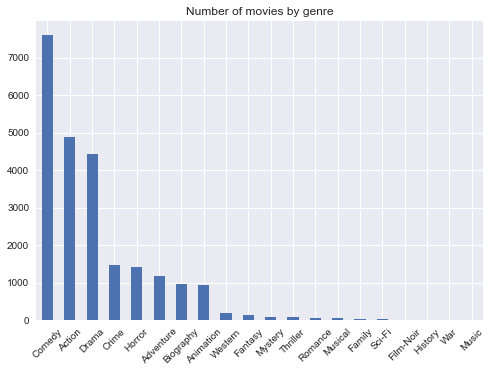

In [23]:
movie_cnt_by_genre = (
    metadata
    .groupby('main_genre')
    ['main_genre']
    .count()
    .sort_values(ascending=False)
)
movie_cnt_by_genre.plot.bar(title='Number of movies by main genre', xlabel='')
plt.xticks(rotation=45)
plt.show()

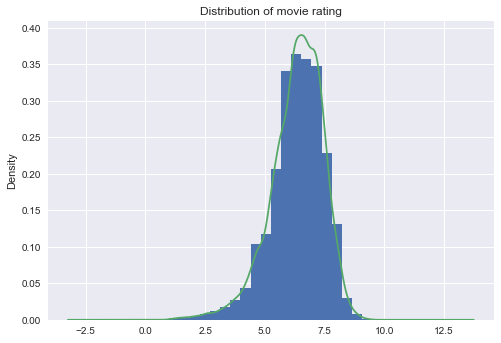

In [36]:
metadata['rating'].hist(bins=20, density=True)
metadata['rating'].plot.kde()
plt.title('Distribution of movie rating')
plt.show()

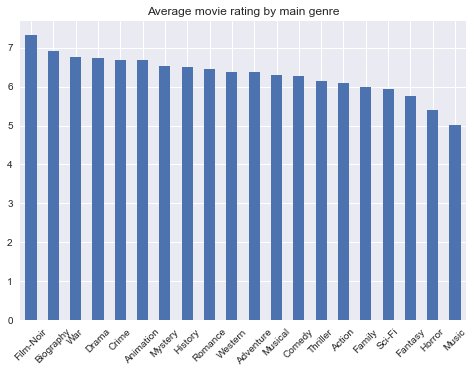

In [49]:
rating_by_genre = metadata.groupby('main_genre')['rating'].mean().sort_values(ascending=False)
rating_by_genre.plot.bar(title='Average movie rating by main genre', xlabel='')
plt.xticks(rotation=45)
plt.show()

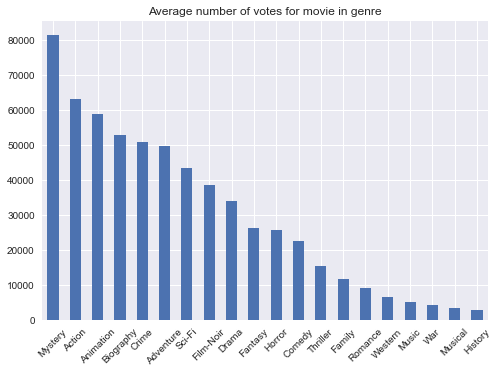

In [52]:
votes_by_genre = metadata.groupby('main_genre')['num_votes'].mean().sort_values(ascending=False)
votes_by_genre.plot.bar(title='Average number of votes for movie in genre', xlabel='')
plt.xticks(rotation=45)
plt.show()

In [5]:
reviews = pd.read_parquet(reviews_files[0], storage_options=storage_options)
reviews.head()

,index,id,text,rating,title,author,upvotes,total_votes,review_date
0,0,/title/tt0113142/,I liked this movie the best out of all the '90...,9.0,A modern day classic kaijyu movie,/user/ur3225430/,24,26,2005-10-10
1,1,/title/tt0113142/,When Gamera first appeared in Japanese theater...,10.0,a magnificently entertaining monster movie; t...,/user/ur6321000/,13,13,2009-11-23
2,2,/title/tt0113142/,"Sooner than I expected, GAMERA Trilogy COMPLET...",9.0,Didn't Disappoint !!,/user/ur20916867/,10,10,2009-04-09
3,3,/title/tt0113142/,This film is the first of the newer Gamera mon...,8.0,Good Introduction to Revive Gamera Trilogy.,/user/ur0437174/,6,6,2007-06-13
4,4,/title/tt0113142/,"This is a good, definitely 90ish monster movie...",8.0,good 90ish monster movie,/user/ur5156469/,7,7,2005-12-04


In [11]:
reviews.memory_usage(deep=True).sum()/1024/1024

282.2816686630249

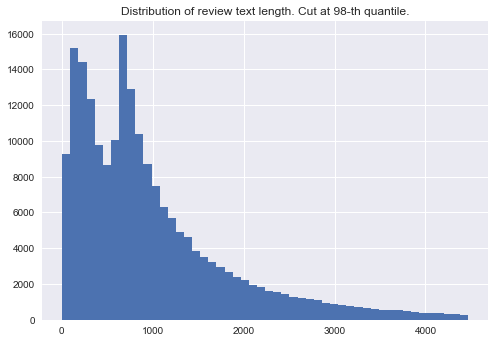

In [73]:
reviews_len = reviews.set_index('review_date')['text'].apply(len)
reviews_len[reviews_len < reviews_len.quantile(0.98)].hist(bins=50)
plt.title('Distribution of review text length. Cut at 98-th quantile.')
plt.show()

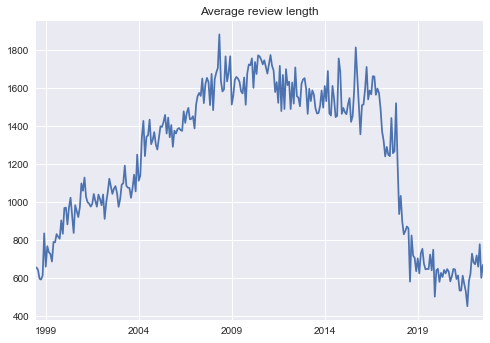

In [78]:
reviews_len.resample('M').mean().plot(title='Average review length', xlabel='')
plt.show()

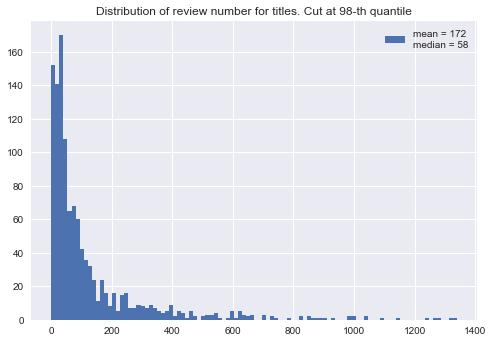

In [47]:
reviews_cnt = reviews.groupby('id')['author'].count()
reviews_cnt[reviews_cnt < reviews_cnt.quantile(0.98)].hist(
    bins=100,
    label=f'mean = {reviews_cnt.mean():.0f}\n'
          + f'median = {reviews_cnt.median():.0f}'
)
plt.title('Distribution of review number for titles. Cut at 98-th quantile')
plt.legend(loc='best')
plt.show()

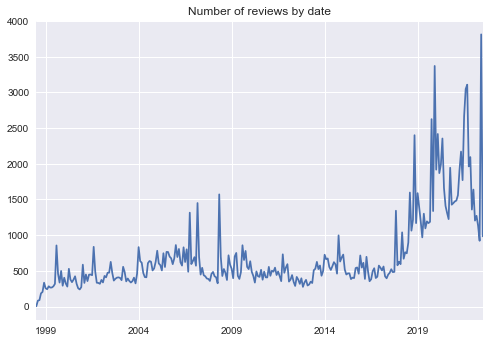

In [49]:
reviews_cnt_dyn = (
    reviews
    .set_index('review_date')
    .resample('M')
    ['author']
    .count()
)
reviews_cnt_dyn.plot(title='Number of reviews by date', xlabel='')
plt.show()

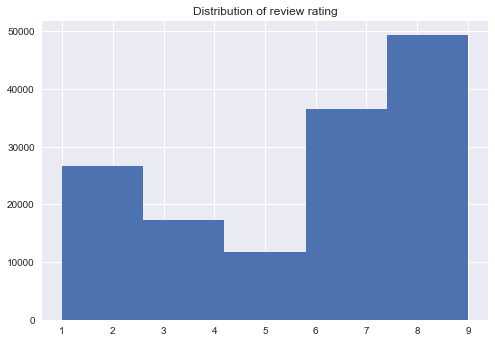

In [57]:
rating_q = reviews['rating'].quantile(0.98)
rating_cut = reviews[reviews['rating'] < rating_q]['rating']
rating_cut.hist(bins=5)
plt.title('Distribution of review rating')
plt.show()

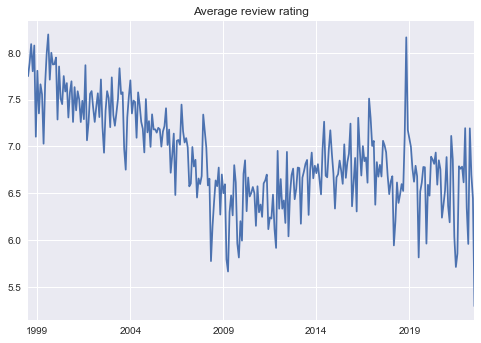

In [77]:
avg_rating_dyn = (
    reviews
    .set_index('review_date')
    .resample('M')
    .agg({'rating': 'mean'})
    ['rating']
)
avg_rating_dyn.plot(
    title='Average review rating', xlabel=''
)
plt.show()

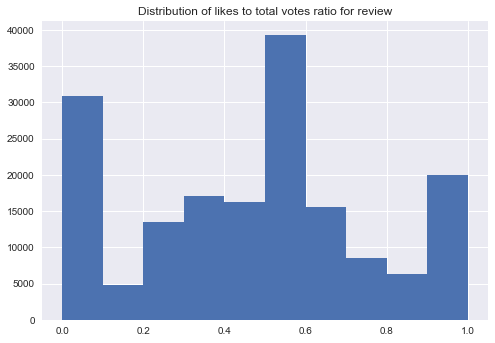

In [92]:
review_like_ratio = reviews.set_index('review_date')['upvotes']\
                    / reviews.set_index('review_date')['total_votes']

review_like_ratio.hist()
plt.title('Distribution of likes to total votes ratio for review')
plt.show()

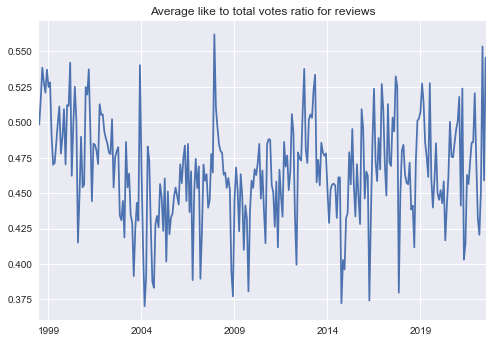

In [90]:
review_like_ratio.resample('M').mean().plot(
    title='Average like to total votes ratio for reviews', xlabel=''
)
plt.show()

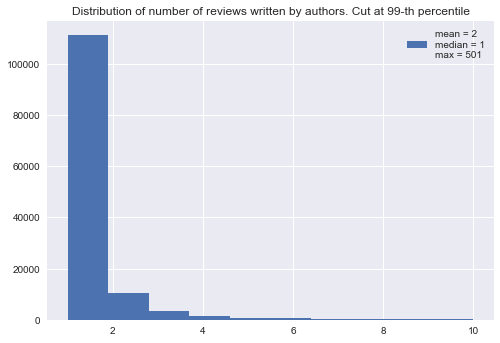

In [105]:
review_num_by_author = (
    reviews
    .set_index('review_date')
    .groupby('author')
    .agg({'author': 'count'})
)
mean_stat = review_num_by_author['author'].mean()
median_stat = review_num_by_author['author'].median()
max_stat = review_num_by_author['author'].max()

q99 = review_num_by_author.quantile(0.99)
review_num_by_author[review_num_by_author < q99].hist(
    label=(
        f'mean = {mean_stat:.0f}\n'
        + f'median = {median_stat:.0f}\n'
        + f'max = {max_stat:.0f}'
    )
)
plt.title('Distribution of number of reviews written by authors. Cut at 99-th percentile')
plt.legend(loc='best')
plt.show()

In [107]:
reviews[['id', 'author', 'rating']].drop_duplicates()

,id,author,rating
0,/title/tt0113142/,/user/ur3225430/,9.0
1,/title/tt0113142/,/user/ur6321000/,10.0
2,/title/tt0113142/,/user/ur20916867/,9.0
3,/title/tt0113142/,/user/ur0437174/,8.0
4,/title/tt0113142/,/user/ur5156469/,8.0
...,...,...,...
204813,/title/tt0118691/,/user/ur0398112/,NaN
204814,/title/tt0118691/,/user/ur119571184/,10.0
204815,/title/tt0118691/,/user/ur136147672/,10.0
204816,/title/tt0118691/,/user/ur19378453/,8.0


In [110]:
user_item_matrix = (
    reviews
    [['id', 'author', 'rating']]
    .drop_duplicates()
    .pivot(index='author', columns='id', values='rating')
)
memusage = user_item_matrix.memory_usage(deep=True).sum() / 1024 / 1024
print(f'{memusage:.2f} Mb')

601.00 Mb


In [113]:
user_item_matrix[~user_item_matrix.isna()].sum()

id
/title/tt0012532/     307.0
/title/tt0014341/     453.0
/title/tt0015174/     171.0
/title/tt0015324/    2645.0
/title/tt0015841/     287.0
                      ...  
/title/tt9689696/     934.0
/title/tt9738784/     372.0
/title/tt9742794/    1541.0
/title/tt9806336/     216.0
/title/tt9907782/     907.0
Length: 1191, dtype: float32

In [119]:
user_item_matrix

id,/title/tt0012532/,/title/tt0014341/,/title/tt0015174/,/title/tt0015324/,/title/tt0015841/,/title/tt0017765/,/title/tt0019585/,/title/tt0020018/,/title/tt0020641/,/title/tt0021106/,...,/title/tt9359344/,/title/tt9430780/,/title/tt9526784/,/title/tt9592496/,/title/tt9637132/,/title/tt9689696/,/title/tt9738784/,/title/tt9742794/,/title/tt9806336/,/title/tt9907782/
author,,,,,,,,,,,,,,,,,,,,,
/user/ur0000006/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/user/ur0000011/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/user/ur0000039/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/user/ur0000059/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/user/ur0000061/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/user/ur99986045/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/user/ur99991504/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/user/ur9999341/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
(~user_item_matrix.isna()).sum().sum()

184998

In [120]:
num_users, num_titles = user_item_matrix.shape
num_total_elements = num_users * num_titles
num_nonempty_elements = (~user_item_matrix.isna()).sum().sum()
sparsity = 100 * (num_total_elements - num_nonempty_elements) / num_total_elements
print(sparsity)

99.88075755787395


In [128]:
memusage_f32 = user_item_matrix.memory_usage(deep=True).sum() / 1024 / 1024
memusage_f16 = user_item_matrix.astype('float16').memory_usage(deep=True).sum() / 1024 / 1024
print(
    f'Float32 memory footprint: {memusage_f32:.1f} Mb',
    f'Float16 memory footprint: {memusage_f16:.1f} Mb',
    sep='\n'
)

Float32 memory footprint: 601.0 Mb
Float16 memory footprint: 305.1 Mb


In [ ]:
reviews = pd.concat((pd.read_parquet))